<a href="https://colab.research.google.com/github/lilyhuong/Python-Mag1/blob/main/projet_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

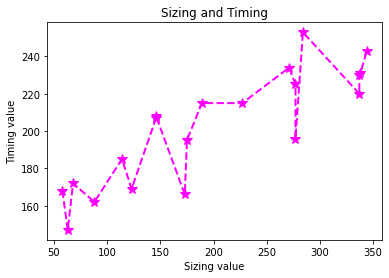

In [9]:
from matplotlib import pyplot as plt
graph1 = pd.read_excel("http://adrianchifu.com/teachings/AMSE/MAG1/data.xlsx", sheet_name = "Graph")
graph1 = graph1.sort_values(by="Sizing")
plt.plot(graph1.Sizing, graph1.Timing, color = 'magenta', marker = '*', linestyle = 'dashed', linewidth = 2, 
         markersize = 10)
plt.title("Sizing and Timing")
plt.xlabel("Sizing value")
plt.ylabel("Timing value")
plt.savefig('D:\S1 - MAG 1\Python\plot.pdf') 
plt.show()

In [4]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
question2 = pd.read_excel("http://adrianchifu.com/teachings/AMSE/MAG1/data.xlsx", sheet_name = "Regression")
X = question2.drop("Blood alcohol concentration", axis = 1)
y = question2["Blood alcohol concentration"]
XRegBis = sm.tools.add_constant(X)
Model = sm.Logit(y, XRegBis)
res = Model.fit()
print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.113699
         Iterations 7
                                Logit Regression Results                               
Dep. Variable:     Blood alcohol concentration   No. Observations:                   16
Model:                                   Logit   Df Residuals:                       14
Method:                                    MLE   Df Model:                            1
Date:                         Wed, 02 Dec 2020   Pseudo R-squ.:                     inf
Time:                                 17:02:55   Log-Likelihood:                -1.8192
converged:                                True   LL-Null:                        0.0000
Covariance Type:                     nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.9233

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [5]:
import pandas as pd
import sklearn 
from sklearn.neural_network import MLPClassifier 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
def Cleaning_base(base, table):
  global question3
  question3 = pd.read_excel(base, sheet_name = table) 
  question3.columns = ["age","workclass", "fnlwgt", "education", "education-num", "marital-status","occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week","native-country", "income"]
  question3.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
                      ['divorced','married','married','married','not married','not married','not married'], inplace = True)
  lb_make = LabelEncoder()
  question3['workclass_code'] = lb_make.fit_transform(question3["workclass"])
  question3['education_code'] = lb_make.fit_transform(question3["education"])
  question3['marital-status_code'] = lb_make.fit_transform(question3["marital-status"])
  question3['occupation_code'] = lb_make.fit_transform(question3["occupation"])
  question3['relationship_code'] = lb_make.fit_transform(question3["relationship"])
  question3['race_code'] = lb_make.fit_transform(question3["race"])
  question3['sex_code'] = lb_make.fit_transform(question3["sex"])
  question3['native-country_code'] = lb_make.fit_transform(question3["native-country"])
  question3['income_code'] = lb_make.fit_transform(question3["income"])
  question3 = question3.drop(["workclass", "education","education-num", "marital-status", "occupation", "relationship","race", "sex", "income", "native-country", "fnlwgt"], axis = 1 )
  return
Cleaning_base ("http://adrianchifu.com/teachings/AMSE/MAG1/data.xlsx", "NN.train")
base1 = question3
Cleaning_base ("http://adrianchifu.com/teachings/AMSE/MAG1/data.xlsx", "NN.test")
base2 = question3
target_column1 = ["income_code"]
predictors1 = list(set(list(base1.columns)) - set(target_column1))
base1[predictors1] = base1[predictors1] / base1[predictors1].max()
target_column2 = ["income_code"]
predictors2 = list(set(list(base2.columns)) - set(target_column2))
base2[predictors2] = base2[predictors2] / base2[predictors2].max()
X_train = base1[predictors1].values
y_train = base1[target_column1].values
X_test = base2[predictors2].values
y_test = base2[target_column2].values
mlp = MLPClassifier(hidden_layer_sizes= (50, 100, 50), activation= 'relu', solver= 'adam', max_iter= 200 )
mlp.fit(X_train, y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[23300  1419]
 [ 2905  4936]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     24719
           1       0.78      0.63      0.70      7841

    accuracy                           0.87     32560
   macro avg       0.83      0.79      0.81     32560
weighted avg       0.86      0.87      0.86     32560

[[11511   923]
 [ 1626  2220]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12434
           1       0.71      0.58      0.64      3846

    accuracy                           0.84     16280
   macro avg       0.79      0.75      0.77     16280
weighted avg       0.84      0.84      0.84     16280

